In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
X = np.load('Input_data_ML.npy')
Y = np.load('Output_data_ML.npy')

In [27]:
Y=Y.T
print(np.shape(X),np.shape(Y))

#Normalising X
x_mean=np.mean(np.mean(X,axis=0),axis=0)
x_std=np.std(np.std(X,axis=0),axis=0)
X=(X-x_mean)/x_std

#Fixing Y[11]
Y[Y[:,11]>2*np.pi,11]=Y[Y[:,11]>2*np.pi,11]-2*np.pi
Y[Y[:,11]<0,11]=Y[Y[:,11]<0,11]+2*np.pi
#Output[:,12:]=Output[:,12:]+2.0*np.pi

X=X[:100000,:]
Y=Y[:100000,:]  

#IQR
Q1=np.quantile(Y,0.10,axis=0)
Q3=np.quantile(Y,0.90,axis=0)
IQR=Q3-Q1
X=X[~((Y < (Q1 - 1.5 * IQR)) |(Y > (Q3 + 1.5 * IQR))).any(axis=1)]
Y=Y[~((Y < (Q1 - 1.5 * IQR)) |(Y > (Q3 + 1.5 * IQR))).any(axis=1)]

#Min_Max Scaling of Y
y_min=np.min(Y,axis=0)
Y=Y-y_min
y_max=np.max(Y,axis=0)
Y=Y/y_max

print(np.shape(X),np.shape(Y))

(1070107, 38) (1070107, 15)
(99988, 38) (99988, 15)


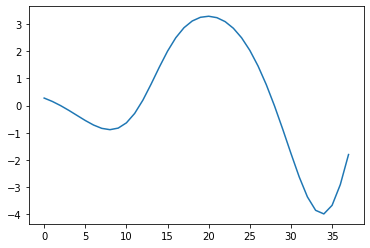

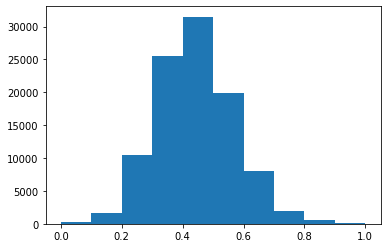

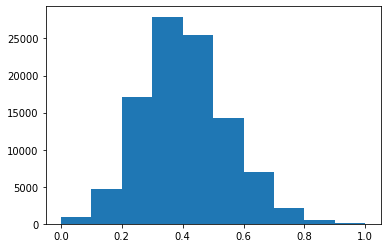

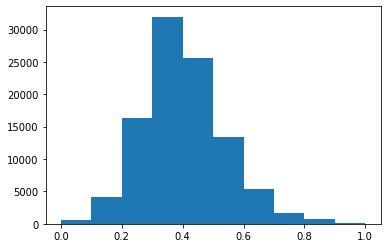

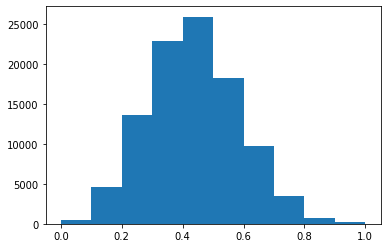

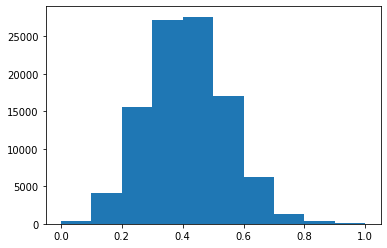

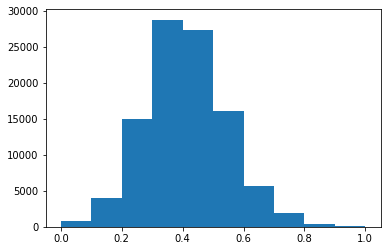

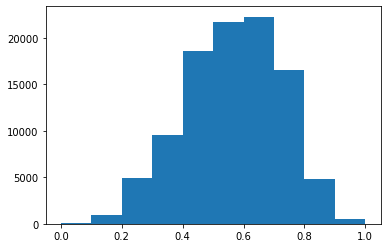

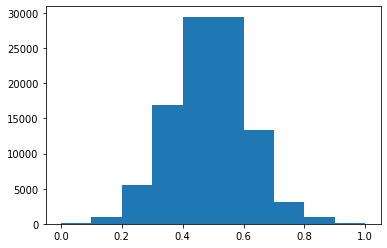

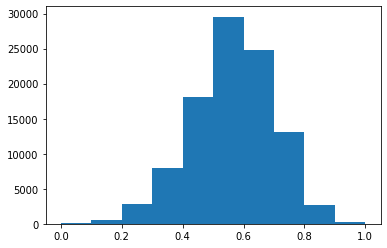

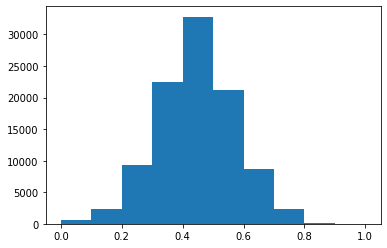

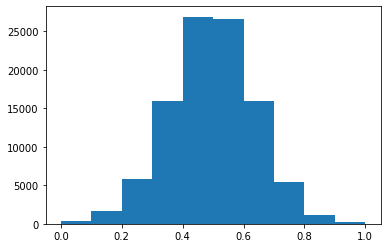

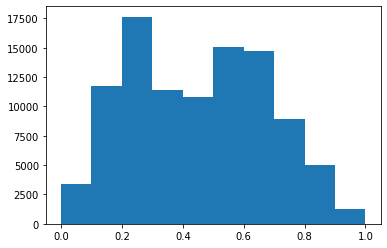

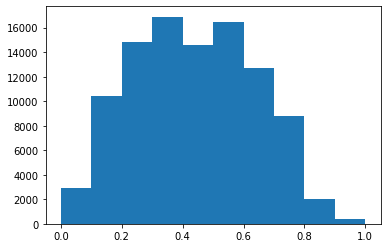

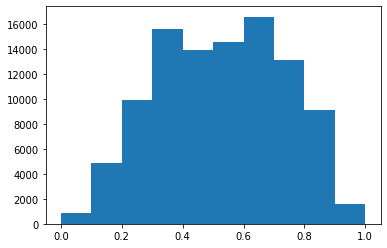

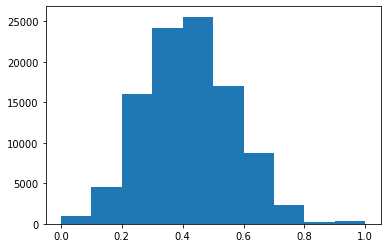

In [28]:
plt.plot(X[10000,:])
plt.show()
for i in range(15):
    plt.hist(Y[:,i])
    plt.show()

In [29]:
Cov=np.transpose(X)@X

In [30]:
eig,W=np.linalg.eig(Cov)
np.shape(W)

(38, 38)

In [32]:
y=np.abs(X@np.transpose(W[:2,:]))
np.shape(y)

(99988, 2)

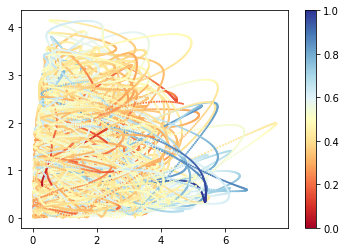

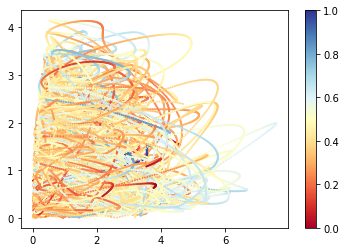

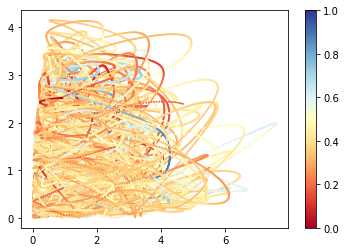

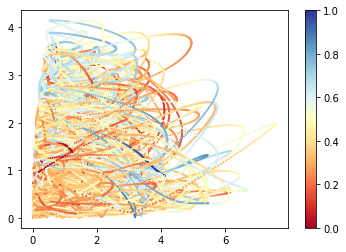

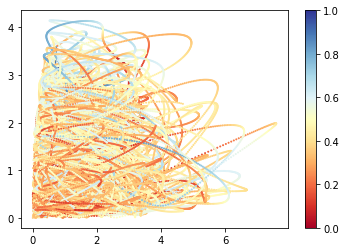

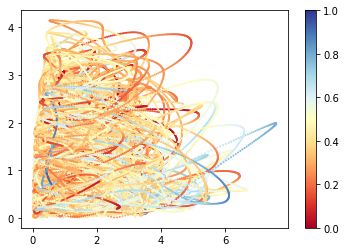

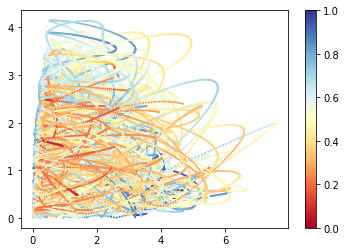

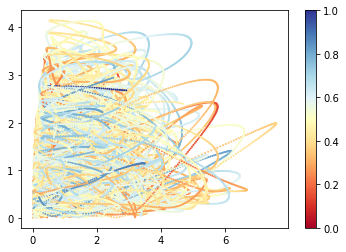

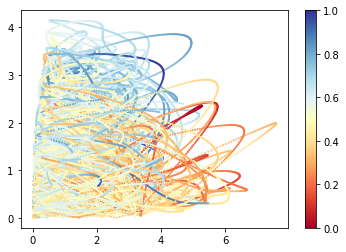

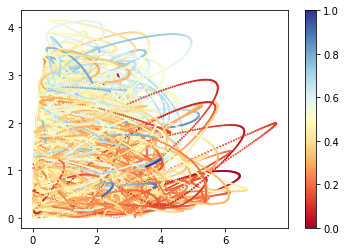

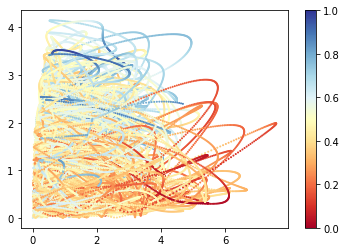

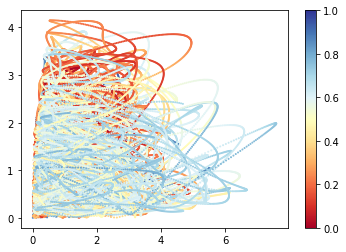

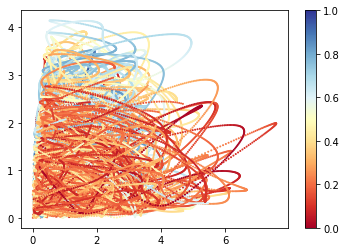

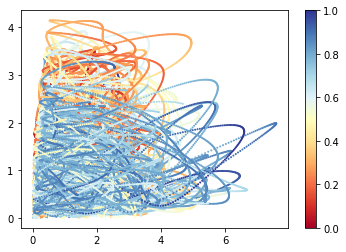

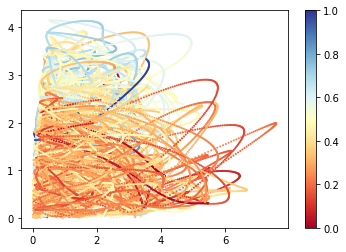

In [33]:
for i in range(15):
    cm = plt.cm.get_cmap('RdYlBu')
    sc = plt.scatter(y[:,0], y[:,1], c=Y[:,i], s=1, cmap=cm)
    plt.colorbar(sc)
    plt.show()